In [4]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

import umap
import umap.plot

In [13]:
from transformers import AutoModelForSequenceClassification, AutoTokenizer
from datasets import load_dataset

In [14]:
def tokenize(batch):
    return tokenizer(batch['text'], padding=True, truncation=True, max_length=250)

In [53]:
MODEL_NAME = 'bert-base-uncased'
tokenizer = AutoTokenizer.from_pretrained(MODEL_NAME)

dataset = load_dataset('glue', 'sst2', split='train[-10%:]')
dataset.rename_column_('sentence', 'text')
dataset = dataset.map(tokenize, batched=True, batch_size=len(dataset))

Reusing dataset glue (C:\Users\fabri\.cache\huggingface\datasets\glue\sst2\1.0.0\7c99657241149a24692c402a5c3f34d4c9f1df5ac2e4c3759fadea38f6cb29c4)
Loading cached processed dataset at C:\Users\fabri\.cache\huggingface\datasets\glue\sst2\1.0.0\7c99657241149a24692c402a5c3f34d4c9f1df5ac2e4c3759fadea38f6cb29c4\cache-c9d60d4b7cb3f124.arrow


In [59]:
mapper = umap.UMAP().fit(dataset['input_ids'])

<AxesSubplot:>

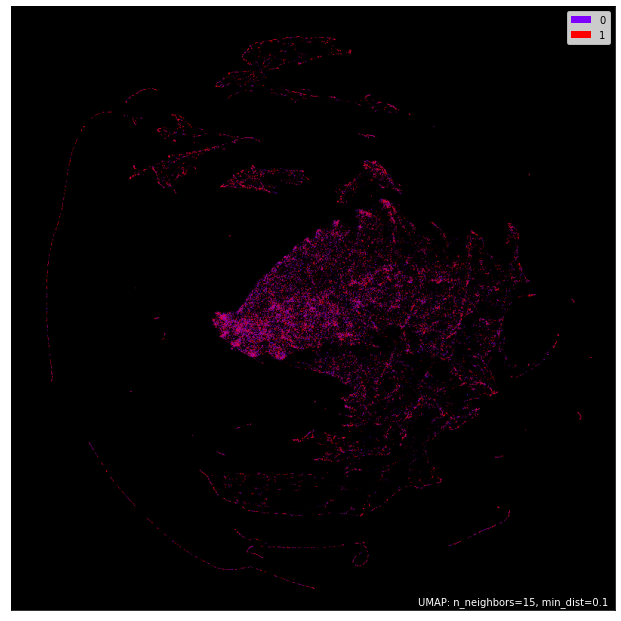

In [60]:
umap.plot.points(mapper, labels=np.array(dataset['label']), theme='fire')

In [50]:
MODEL_NAME = 'bert-base-uncased'
tokenizer = AutoTokenizer.from_pretrained(MODEL_NAME)

dataset = load_dataset('ag_news', split='train')
dataset = dataset.map(tokenize, batched=True, batch_size=len(dataset))

Using custom data configuration default
Reusing dataset ag_news (C:\Users\fabri\.cache\huggingface\datasets\ag_news\default\0.0.0\fb5c5e74a110037311ef5e904583ce9f8b9fbc1354290f97b4929f01b3f48b1a)
Loading cached processed dataset at C:\Users\fabri\.cache\huggingface\datasets\ag_news\default\0.0.0\fb5c5e74a110037311ef5e904583ce9f8b9fbc1354290f97b4929f01b3f48b1a\cache-a4d6705a59977031.arrow


In [51]:
mapper = umap.UMAP().fit(dataset['input_ids'])

<AxesSubplot:>

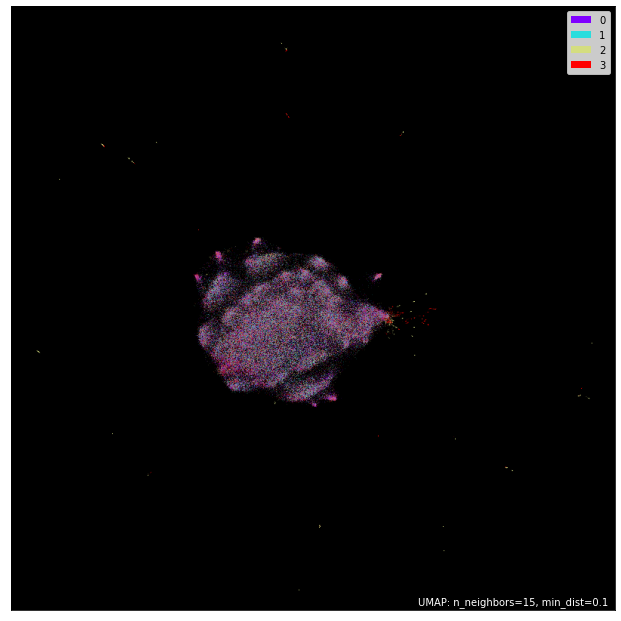

In [52]:
umap.plot.points(mapper, labels=np.array(dataset['label']), theme='fire')